In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
car_data=pd.read_csv("dataset/car_price_prediction.csv")
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

# Information about the columns 

| **Column Name**      | **Type**  | **Explanation**                                                                                                                                 |
| -------------------- | --------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| **ID**               | `int64`   | A unique identification number for each vehicle. Generally unnecessary for modeling purposes.                                                   |
| **Price**            | `int64`   | The vehicle’s sales price (label variable / dependent variable). It is the value to be predicted.                                               |
| **Levy**             | `object`  | The vehicle’s annual tax or usage tax. Some lines may contain `"–"` (missing data). It’s usually a numeric value, but it’s kept in text format. |
| **Manufacturer**     | `object`  | The make of the vehicle (e.g., Toyota, BMW, Mercedes-Benz).                                                                                     |
| **Model**            | `object`  | The model name of the vehicle (e.g., Corolla, 320i, C-Class).                                                                                   |
| **Prod. year**       | `int64`   | The vehicle’s production year. Also known as the model year.                                                                                    |
| **Category**         | `object`  | Class or type of vehicle (e.g., Sedan, SUV, Hatchback, Coupe, Minivan, etc.).                                                                   |
| **Leather interior** | `object`  | Whether it is a leather seat is usually “Yes” or “No”.                                                                                          |
| **Fuel type**        | `object`  | Fuel type (e.g., Petrol, Diesel, Hybrid, Electric, LPG).                                                                                        |
| **Engine volume**    | `object`  | Engine displacement (e.g., “2.0”, “3.5 Turbo”, “1.6 Hybrid”). Can contain both numerical values and text. Requires cleaning.                    |
| **Mileage**          | `object`  | The vehicle’s mileage (e.g., “120,000 km”). It needs to be converted to a number.                                                               |
| **Cylinders**        | `float64` | Number of engine cylinders (e.g., 4, 6, 8). Missing values may occur.                                                                           |
| **Gear box type**    | `object`  | Gear type (e.g., Automatic, Manual, Tiptronic, Variator).                                                                                       |
| **Drive wheels**     | `object`  | Traction type. (Front, Rear, 4x4).                                                                                                              |
| **Doors**            | `object`  | Number of doors (e.g., “4”, “2”). Some lines may contain values such as “>5” or “?”                                                             |
| **Wheel**            | `object`  | Steering wheel position: Left or Right (Left-hand drive / Right-hand drive).                                                                    |
| **Color**            | `object`  | Vehicle exterior color (e.g., Black, White, Silver, Blue).                                                                                      |
| **Airbags**          | `int64`   | The number of airbags in the vehicle. Can be used as a safety indicator.                                                                        |


In [3]:
car_data.drop(["ID"], axis=1, inplace=True)

Let's check if the dataset have any missing data

In [4]:
car_data.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

Let's see the unique entires of every columns

In [5]:
for col in car_data.columns:
    print(f'Category in {col} is :\n {car_data[col].unique()}\n')
    print('\\'*50)

Category in Price is :
 [13328 16621  8467 ... 56814 63886 22075]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Levy is :
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286'

Let's fix the problem with Levy column

| **Column Name**      | **Type**  | **Explanation**                                                                                                                                 |
| -------------------- | --------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| **Levy**             | `object`  | The vehicle’s annual tax or usage tax. Some lines may contain `"–"` (missing data). It’s usually a numeric value, but it’s kept in text format. |

In [6]:
car_data["Levy"]=car_data["Levy"].str.replace('-','')
car_data["Levy"]=pd.to_numeric(car_data["Levy"], errors='coerce')
car_data.fillna({"Levy": car_data["Levy"].mean()}, inplace=True)
car_data["Levy"]=car_data["Levy"].astype("float32")
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float32
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

Let's fix the next issue

| **Column Name**      | **Type**  | **Explanation**                                                                                                                                 |
| -------------------- | --------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| **Engine volume**    | `object`  | Engine displacement (e.g., “2.0”, “3.5 Turbo”, “1.6 Hybrid”). Can contain both numerical values and text. Requires cleaning.                    |

In [7]:
car_data["Engine volume"]=car_data["Engine volume"].str.replace("Turbo","")
car_data["Engine volume"]=car_data["Engine volume"].astype("float32")

In [8]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float32
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float32
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

Let's fix the next issue


| **Column Name**      | **Type**  | **Explanation**                                                                                                                                 |
| -------------------- | --------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| **Mileage**          | `object`  | The vehicle’s mileage (e.g., “120,000 km”). It needs to be converted to a number.                                                               |

In [9]:
#lets change the column name first 
car_data.rename(columns={"Mileage":"Mileage(Km)"}, inplace=True)
#now lets remove "km" from the entiries and change the datatype
car_data['Mileage(Km)']=car_data['Mileage(Km)'].str.replace('km',"")
car_data["Mileage(Km)"]=car_data["Mileage(Km)"].astype('int32')

In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float32
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  float32
 9   Mileage(Km)       19237 non-null  int32  
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [11]:
car_data["Mileage(Km)"].head()

0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage(Km), dtype: int32

Let's find the age of the car

In [12]:
import datetime as dt

In [13]:
dtime=dt.datetime.now()
car_data['Age']=dtime.year-car_data['Prod. year']
car_data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage(Km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,13328,1399.000000,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,15
1,16621,1018.000000,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,14
2,8467,906.838135,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,19
3,3607,862.000000,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,14
4,11726,446.000000,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11


Let's Remove the Doors column. Its not that important

In [14]:
car_data.drop("Doors",axis=1, inplace=True)
car_data.drop("Prod. year", axis=1, inplace=True)

let's save the final dataset

In [15]:
car_data.to_csv("dataset/Clean_data.csv",index=False)

# Now, let's start visualizing the data 

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Levy'}>,
        <Axes: title={'center': 'Engine volume'}>],
       [<Axes: title={'center': 'Mileage(Km)'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Airbags'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >, <Axes: >]],
      dtype=object)

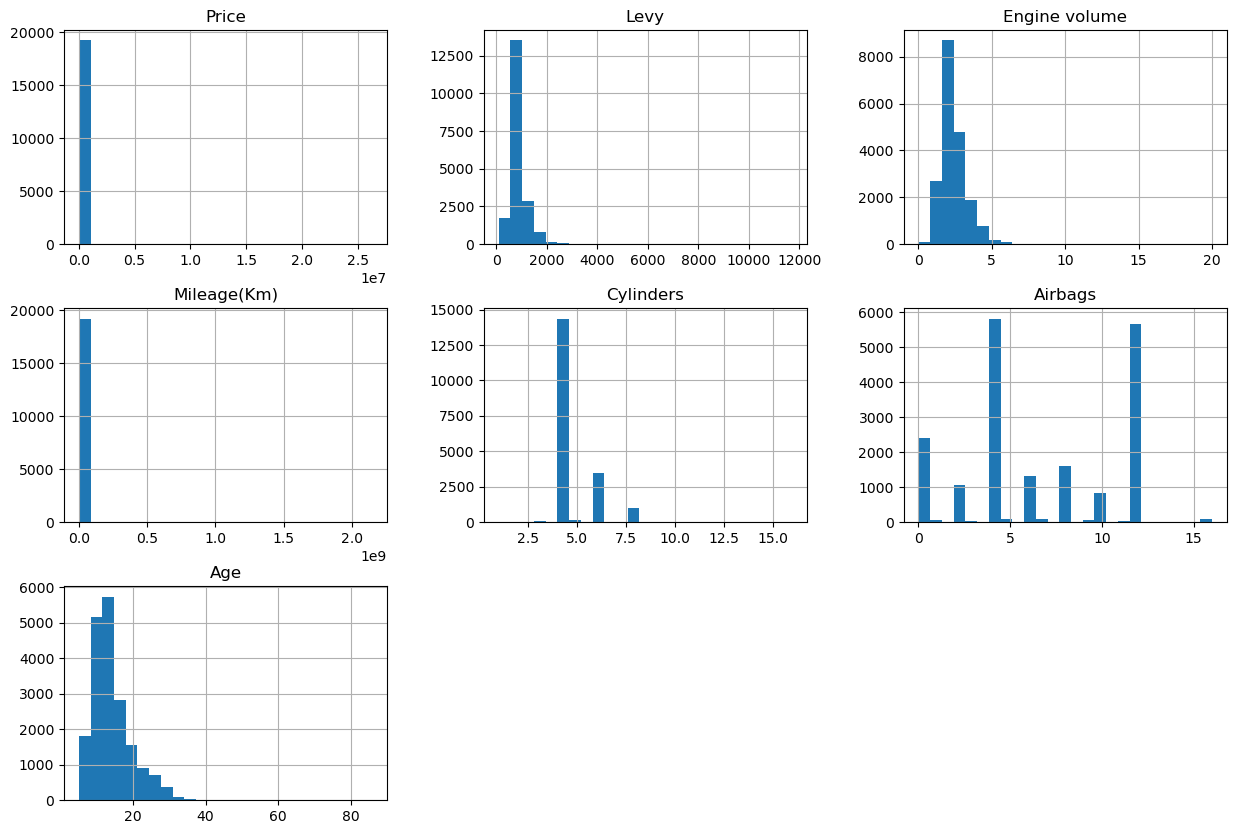

In [16]:
car_data.hist(bins=25,figsize=(15,10))

In [17]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heatmap')

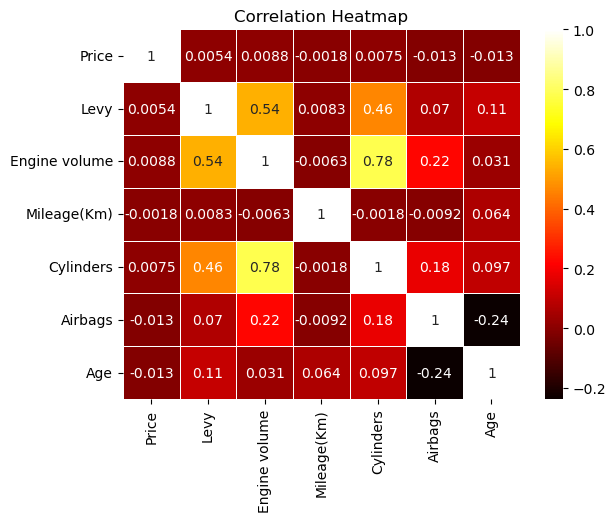

In [18]:
cor=car_data.select_dtypes(exclude=object).corr()
sns.heatmap(cor, annot=True, linewidths=0.5,cmap='hot')
plt.title("Correlation Heatmap")

Let’s plot a graph showing the relationship between Levy and Engine volume.

In [19]:
import seaborn as sns

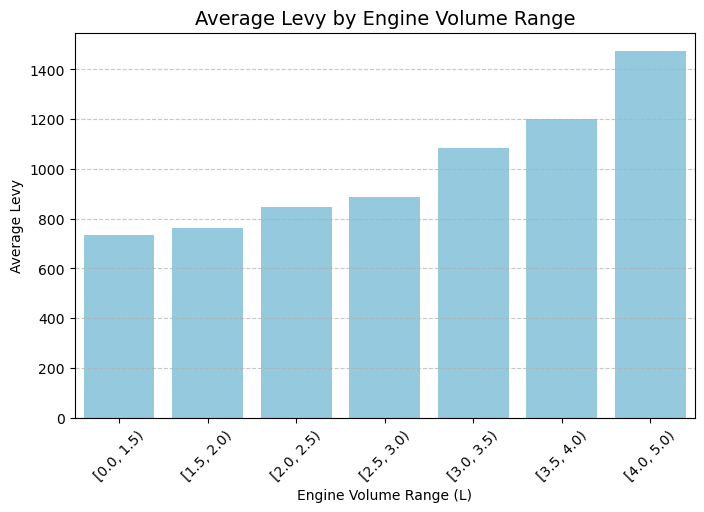

In [20]:
car_data["Engine_volume_bin"] = pd.cut(car_data["Engine volume"], bins=[0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0], right=False)
plt.figure(figsize=(8,5))
sns.barplot(x="Engine_volume_bin", y="Levy", data=car_data, errorbar=None, color="skyblue")
plt.title("Average Levy by Engine Volume Range", fontsize=14)
plt.xlabel("Engine Volume Range (L)")
plt.ylabel("Average Levy")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

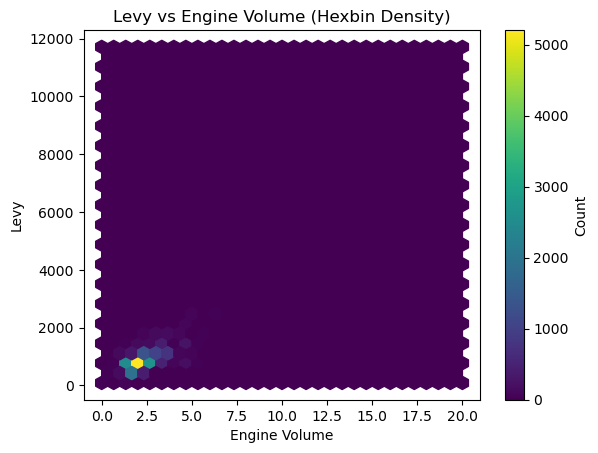

In [21]:
plt.hexbin(car_data["Engine volume"], car_data["Levy"], gridsize=30, cmap="viridis")
plt.colorbar(label="Count")
plt.xlabel("Engine Volume")
plt.ylabel("Levy")
plt.title("Levy vs Engine Volume (Hexbin Density)")
plt.show()


Let’s plot a graph showing the relationship between Cylinders and Engine volume.

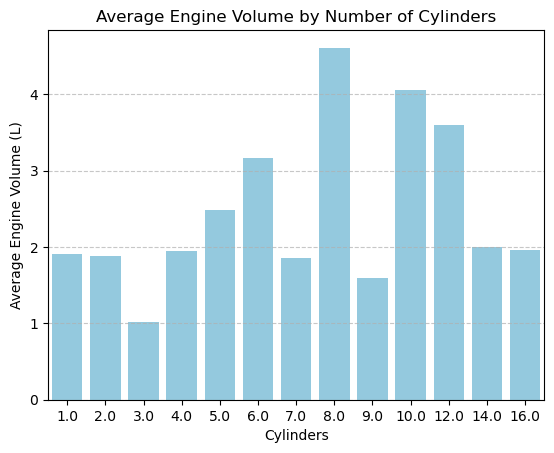

In [22]:
sns.barplot(x="Cylinders", y="Engine volume", data=car_data, errorbar=None, color="skyblue")
plt.title("Average Engine Volume by Number of Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Average Engine Volume (L)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

Let’s plot a graph showing the relationship between Levy and Number of Cylinders.

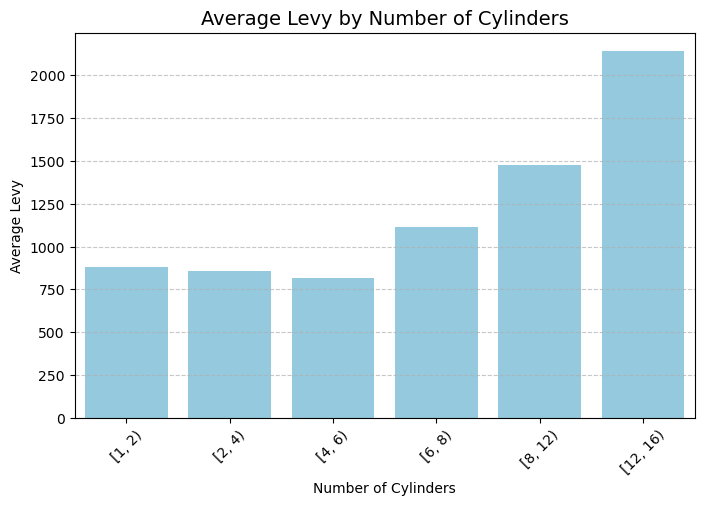

In [23]:
car_data["Cylinders_bin"] = pd.cut(car_data["Cylinders"], bins=[1, 2, 4, 6, 8, 12, 16], right=False)
plt.figure(figsize=(8,5))
sns.barplot(x="Cylinders_bin", y="Levy", data=car_data, errorbar=None, color="skyblue")
plt.title("Average Levy by Number of Cylinders", fontsize=14)
plt.xlabel("Number of Cylinders")
plt.ylabel("Average Levy")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

C:\Users\urbes\AppData\Local\Temp\ipykernel_37480\3377452109.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_data, x=col, palette='hot', legend=False )
C:\Users\urbes\AppData\Local\Temp\ipykernel_37480\3377452109.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_data, x=col, palette='hot', legend=False )
C:\Users\urbes\AppData\Local\Temp\ipykernel_37480\3377452109.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car_data, x=col, palette='hot', legend=False )
C:\Users\urbes\AppData\Local\Temp\ipykernel_37

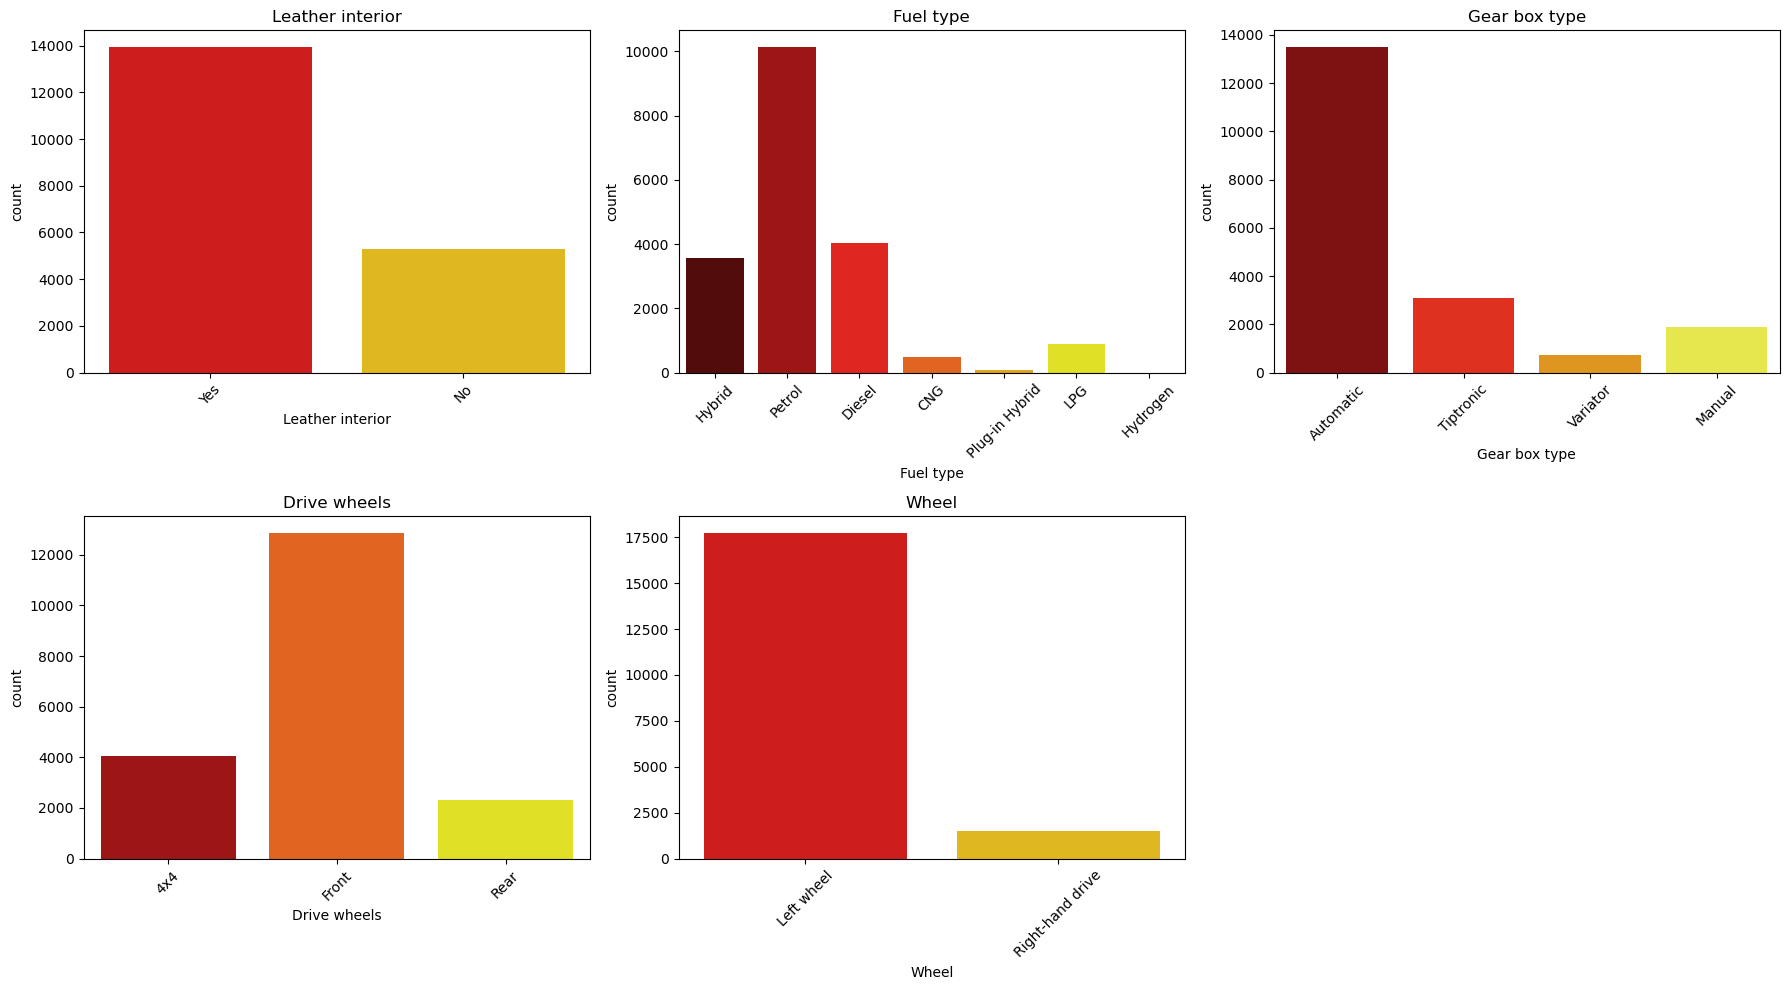

In [24]:
columns = ['Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel']

plt.figure(figsize=(18, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)  
    sns.countplot(data=car_data, x=col, palette='hot', legend=False )
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()

C:\Users\urbes\AppData\Local\Temp\ipykernel_37480\2987806552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_10_cars, y = top_10_cars.index, palette='hot', linewidth = 4)


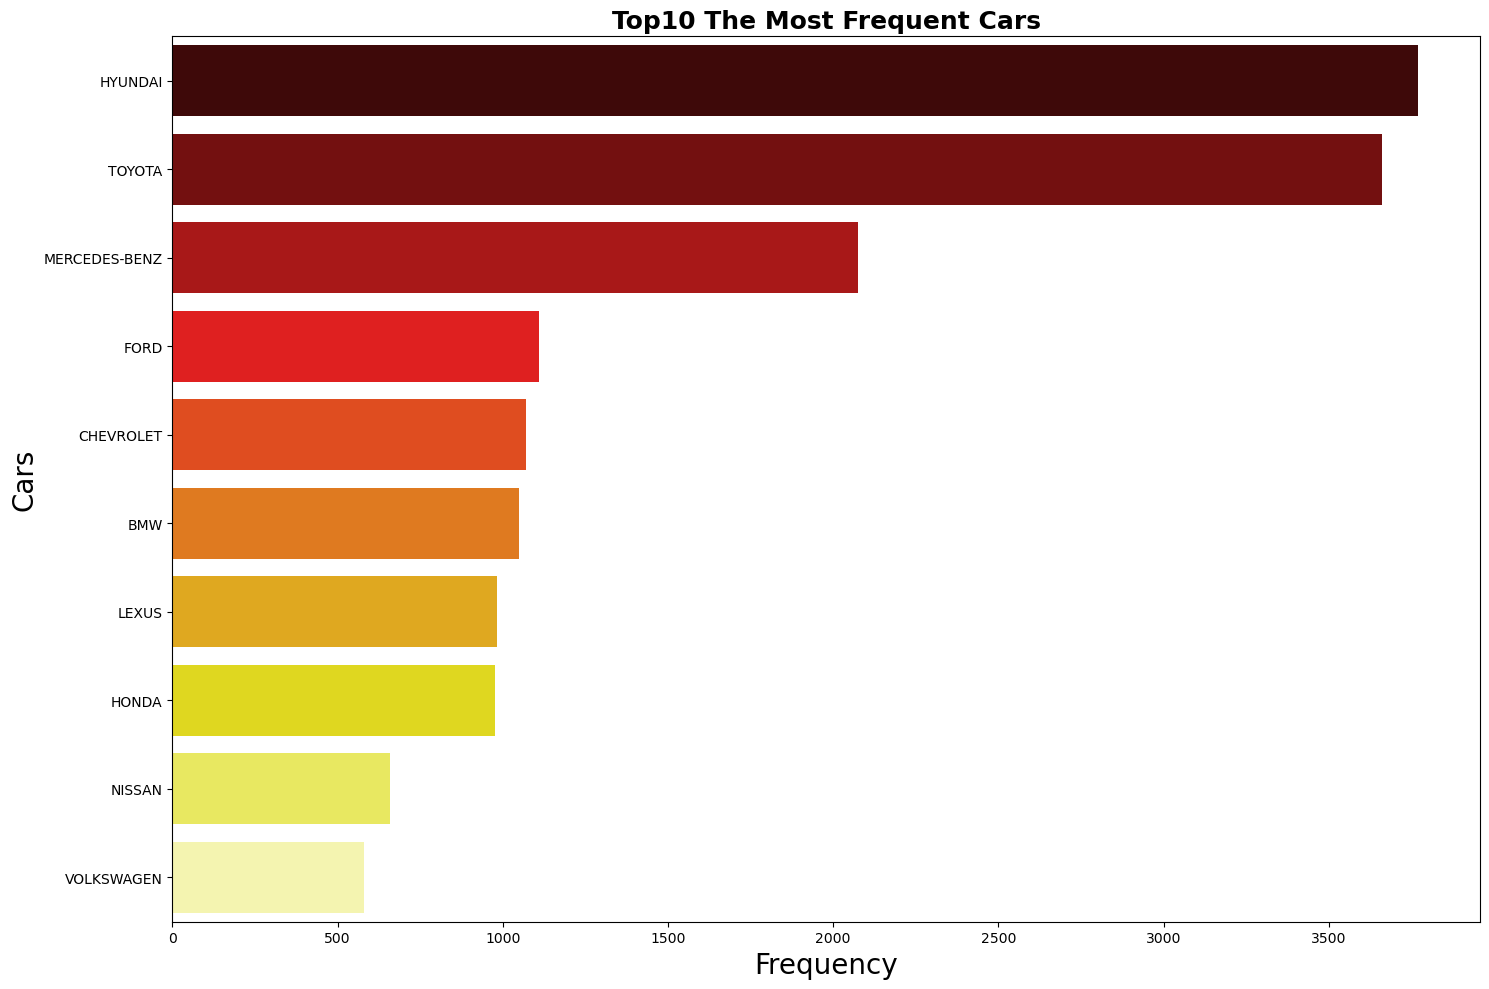

In [25]:
top_10_cars = car_data["Manufacturer"].value_counts().sort_values(ascending=False)[:10]
plt.figure(figsize=(15, 10))
sns.barplot(x = top_10_cars, y = top_10_cars.index, palette='hot', linewidth = 4)
plt.title('Top10 The Most Frequent Cars', loc='center', fontweight='bold', fontsize=18)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Cars', fontsize=20)
plt.tight_layout()
plt.show()